# Regressão Linear Simples

Neste notebook, será abordado um exemplo para a realização de um estudo entre a relação de variáveis utilizando Regressão Linear Simples e como podemos estruturas os dados para esta tarefa, realizar na prática, e compreender/analisar os resultados.

O caso que será estudado, envolverá duas variáveis aleátorias X e Y, que foram geradas artificialmente especificamente para a tarefa de Regressão Linear Simples, e além disso temos uma separação entre dados de treino e teste, para no final conseguir verificar se nosso modelo consegue predizer bem novos valores.

Inicialmente é interessante importar todas as bibliotecas que serão utilizadas para não termos problemas com importações no futuro

In [3]:
# Libs essenciais
import pandas as pd
import numpy as np

# Libs de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns


# Imports do Sklearn para realizar a regressão
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Import do Scipy para realizar a regrssão
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
# Vamos importar o conjunto de dados
df = pd.read_csv('train.csv')

In [5]:
# Verificando a estrutura do arquivo
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
# Verificando o tamanho do conjunto de treino
df.shape

(700, 2)

Acima, pudemos verificar um pouco mais sobre o conjunto de dados, e entender como ele está disposto em termos de atributos e de tamanho. Ele só tem 2 atributos, pois neste caso estamos tratando de Regressão Simples, que visa compreender a relação entre duas variáveis e verificar se esta relação pode ser expressa linearmente.

# Análise descritiva

Como este conjunto de dados foi gerado artificialmente, provavelmente não haverá muito tratamento necessário para ser realizado, mas podemos realizar algumas visualizações para tentar entender se há algum tipo de relação entre essas duas variáveis

In [7]:
# Verifica se há valores NULOS
df.isna().sum()

x    0
y    1
dtype: int64

In [8]:
# Verificando o que está acontecendo. Como se trata de apenas uma valor iremos excluí-lo para que não haja interferência
df.loc[df.y.isna() == True,df.columns]

,x,y
213,3530.157369,NaN


In [9]:
df.dropna(axis=0,inplace=True)

Após remover o valor nulo, podemos realizar algumas visualizações sobre os valores. Uma nota, não será necessário normalizar o conjunto de dados, pois como estamos lidando com regressão linear simples, isto não é necessário visto que o nosso foco é realmente obter uma explicação da variável Y em relação a variável X

Inicialmente vamos verificar como os dados estão dispostos

In [10]:
X = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

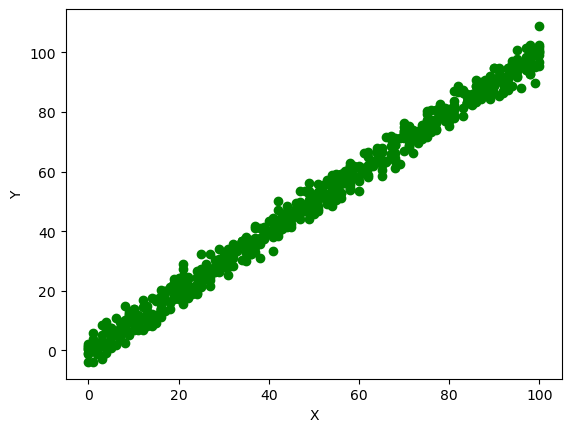

In [11]:
plt.scatter(X, y, color ='green')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Acima, podemos supor que os pontos estão dispostos de uma maneira que podem ser descritos linearmente. Mesmo sendo apenas uma visualização, podemos pensar nisso, mas teremos que comprovar isto na prática, com a realização de uma regressão.

In [12]:
df.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


Ao verificar a correlação podemos compreender que o conjunto de dados possui uma alta correlação, o que pode ser explicado por ter sido gerado artificialmente, então com isso, a chance de que haja linearidade entre essas duas variáveis só aumenta

Outra técnica interessante para visualizar os dados é o histograma, para compreender como os valores estão dispostos, e se eles se assemelham a uma distribuição normal, algo que é essencial para a realização da regressão, visto que a normalidade é algo muito importante.

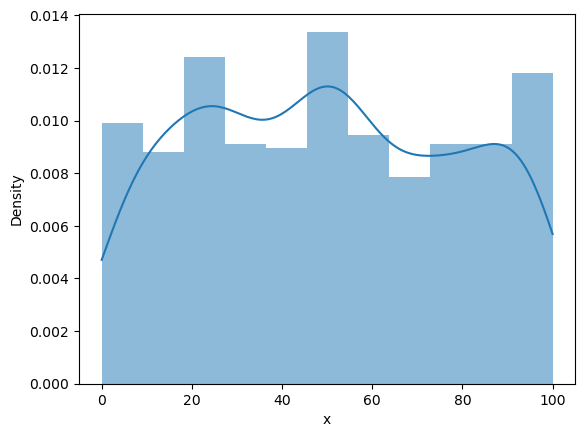

In [13]:
sns.histplot(df["x"],kde=True, stat="density", linewidth=0)

plt.show()

Podemos também utilizar a reta QQ (Quantile-Quantile) para entender se os nossos dados estão ajustados a reta normal

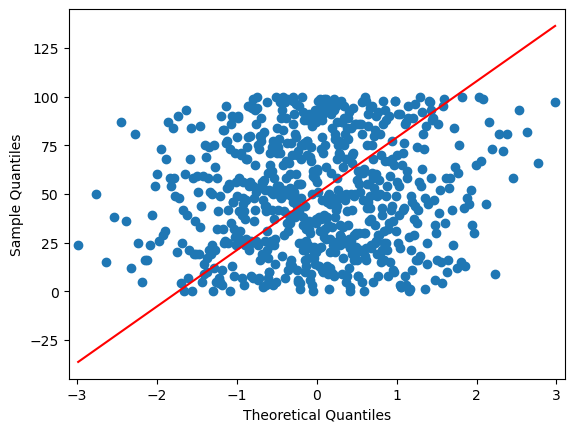

In [14]:
import statsmodels.api as sm
import pylab

sm.qqplot(X, line='s') # Reta Normal
pylab.show()


Podemos visualizar acima que não existe uma distribuição normal aparente, mas mesmo assim, iremos realizar a regressão, pois Regressões lineares funcionam bem em muitos contextos, mas se você quiser realizar testes de hipóteses sobre os parâmetros da sua regressão, por exemplo, você pode ter problemas. Entretanto, como nossa amostra é grande o suficiente, podemos evitar este teste. Além disso, isto provavelmente acontece, pelo fato do conjunto de dados ser artificial o que acarreta nesse problema, mas como dito, isto não será um problema.

# Conjunto de teste

Nesta etapa, iremos apenas garantir que o conjunto de teste não tenha nenhum tipo de valor NULO, para que futuramente tenhámos problema na hora da predição de valores

In [15]:
df_test = pd.read_csv('test.csv')

In [16]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [17]:
df.shape

(699, 2)

In [18]:
df.isna().sum()

x    0
y    0
dtype: int64

Felizmente não temos nenhum tipo de problema, então podemos prosseguir com a regressão

# Regressão

Nessa lógica, iremos realizar a regressão de fato para o nosso conjunto de dados. Como o python é uma linguagem amplamente utiliza para discutir estátistica e realizar projetos, temos diversas bibliotecas que realizam a Regressão Linear. Neste notebook, iremos abordar o SkLearn e o Scipy.

## SKlearn

O Sklearn, embora seja uma biblioteca muito poderosa, para a regressão tem alguns problemas, como por exemplo, a ausência do teste de hipóteses. Entretanto as outras funções existem e podem facilmente ser analisadas

In [19]:
# Instanciando o modelo
regr = LinearRegression()

Acima, instanciamos o objeto do modelo, isso significa que agora REGR possui as propriedades da Classes da Regressão linear do Sklearn, isso significa que agora podemos utilizar a variável REGR para chamar as funções (métodos) da classe.

A primeira função que precisamos chamar é a .fit(X,y) . É importante notar que esta função recebe primeiro a variável independente e depois a variável dependente. Ao realizar a chamada desta função estamos criando a equação da regressão no formato $y = \beta_0 + \beta_1x + E$ 

Asssim, podemos chamar o método abaixo

In [20]:
regr.fit(X,y)

LinearRegression()

Ao realizarmos isso, temos os coeficientes $\beta_0$ e $\beta_1$. Para isso, o objeto REGR tem dois atributos que indicam isso: .coef_ que seria o coeficiente angular da reta, $\beta_1$ e o intercept_ que seria o coeficiente linear da reta, $\beta_0$.

In [21]:
#b0
regr.intercept_

array([-0.10726546])

In [22]:
regr.coef_

array([[1.00065638]])

Isso significa que nossa equação de regressão tem a seguinte forma:


$ y= -0.1072 + 1.0006*x$

Isso significa que: X tem muita pouca influência em Y, tendo em vista que o coeficiente angular da reta é quase próximo de 1, que pode ser explicado pela grande correlação dos valores

Assim, podemos realizar a verificação da Soma dos Quadrados dos Erros, e consequentemente o valor de $R²$ e em seguida realizar a predição do modelo

In [23]:
mean_squared_error(X,y)

7.87365428036943

A soma dos erros é bem pequena, devido ao fato da correlação entre as variáveis ser muito poderosa, e a equação conseguir se ajustar bastante a conjunto de dados. Abaixo podemos verificar o R-2 score do nosso modelo

In [24]:
r2_score(X,y)

0.9905948841595947

Como esperado o valor deu muito alto, quase atingindo o valor de 1, que seria um valor quase perfeito. É importante ressaltar que um valor como esse não é comum de acontecer, caso a correlação das variáveis não seja muito alta.

Finalmente, podemos realizar a predição do modelo com o conjunto de dados de teste e verificar graficamente se atingimos bons resultados. Para isso, iremos pedir ao nosso modelo para chamar o método .predict() e passar o array X como parâmetro.

In [25]:
# Predição do modelo
predictions = regr.predict(X)

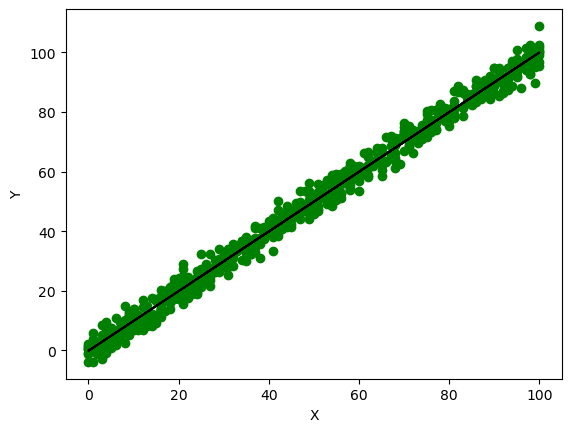

In [26]:
plt.scatter(X, y, color ='green')
plt.plot(X, predictions, color ='black')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Podemos verificar acima, que a reta se ajustou bastante ao conjunto de dados. Isso novamente é explicado pela alta correlação dos atributos que faz com que a reta seja muito bem ajustada. Caso estes dois atributos pertencessem a um conjunto de dados com mais dimensionalidades, provavelmente poderiamos retirar um deles, visto que eles representam quase as mesmas informações. 

Bom, com o R2, podemos entender que 99% da variável Y pode ser explicada pela variável X, que é um valor muito alto, e que provavelmente representa ambiguidade das variáveis.

## Scipy

Agora iremos apresentar uma abordagem utilizando o Scipy para a realizar a Regressão Linear e o teste de Hipóteses para o nosso conjunto de dados.

O modelo do scipy já é um pouco diferente do Sklearn, pois possui algumas funcionalidade adicionais. A primeira diferença já está presente na instanciação do objeto, onde a variável dependente é inserida primeiro, seguido da variável independente. Nota-se que é necessário inserir este X com o sm.add_constant para que o modelo leva em conta o $\beta_0$, caso contrário seu valor será 0. 

In [27]:
# Instancia o modelo
modelo = sm.OLS(y, sm.add_constant(X))

Novamente iremos dar um .fit() para ajustar o modelo ao nosso conjunto de dados, mas desta vez, como já passamos os valores de entrada, não será necessário colocar o .fit() com os arrays.

In [28]:
modelo = modelo.fit(use_t=False)

Após isso, nosso modelo já contém a reta feita. Algo muito interessante que podemos realizar, é dar um .summary() no objeto 'modelo' para verificarmos todos os resultados da nossa regressão, inclusive o teste de hipóteses.

In [29]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:02:50   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.613      -0.523       0.309
x1             1.0007      0.004    272.510      0.000       0.993       1.008
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.216
Skew:                           0.036   Prob(JB):                        0.898
Kurtosis:                       2.952   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A tabela gerada pelo scipy é muito grande e possui muitas informações, então, vamos analisá-la parte por parte para poder compreender melhor oque elas significam.

A primeira parte a ser analisada será a parte superior da tabela:

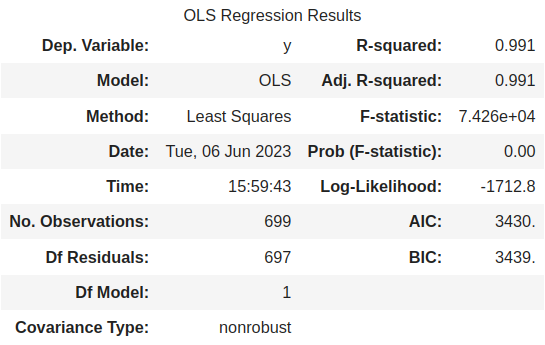


Primeiramente, OLS se refere ao método utilizado para encontrar os estimadores: Método dos quadrados mínimos.

**Dep Variable:** Representa qual a nossa variável dependente, neste caso é Y, é importante ressaltar que este nome é derivado do nome da variável que foi passado na instanciação do objeto.

**No. Observations:** Número de amostras no conjunto de dados

**Df Residual:** Grau de liberado do nosso teste de hipóteses realizado, como no nosso caso estamos lidando com duas variáveis será n-2. É importante ressaltar que caso tivessemos 4 atributos independente, o grau de liberadade seira n - 1 - 4.


**Df Model:** Número de variáveis que serão utilizadas para predizer Y, neste caso apenas uma.

**Covariance Type:** Covarancia é a medida de quão duas variáveis estão relacionadas, a uma covariancia robusta é uma que é calculada para elmiminar possíveis atributos que estejam relacionados, o que não é o nosso caso, por isso nonrobust

**R-Square:** R-2 score, que foi exibido acima


**Adj R-Square:** Um R2 ajustado para compreender a interferência de diverasas variáveis, como não temos não será abordado.

**F-Statistic:** Compara o modelo linear produzido contra um modelo que troca o efeito da variável para 0, ou seja, não utiliza, descobrindo se uma variável é estatiscamente significante. Para interpretar este resultado seria necessário escolher um valor de alpha como o nível de significância e visualizar os valores na F-Table.

**Prob (F-Statistic):** Esse número é utilizado para indicar se a hipótese nula deve ser aceita ou não.

**AIB e BIC:** Compara a eficiência do modelo no processo de regressão linear, usando um sistema de penalidade para medir múltiplas varíaveis, pode ser utilizada para a feture selection, mas neste caso não é relevante.

Em seguida podemos utiliza a segunda parte da tabela

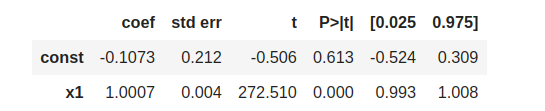

Acima, const se refere ao valor de $\beta_0$ e x1 se refere ao valor de $\beta_1$.

**coef:** Indica o valor do coeficiente, nota-se que é igual ao valor do Sklearn, indicando que ambos os métodos estão coerentes, já que utilizam a mesma técnica para encontrar os coeficientes, OLS.

**std err:** Uma estimativa do desvio padrão do coeficiente, uma medida de variação do coeficiente nos pontos.

**t:** t está relacionado com o teste t, representando o valor observado para uma medida especifica. Um baixo std_err comparado com um coeficiente alto irá produzir um valor de t muito grande, o que irá representar uma alta significância do coeficiente.


**P>|t|:** Utiliza a estátistica t para produzir o valor-p, uma medida utilizada no teste de hipóteses T. Como estudado, se aplicássemos um nivel de significância $\alpha$= 5% a hipótese nula em $\beta_0$ seria aceita, e este coeficiente poderia ser ajustado para 0. É importante ressaltar que este valor que aparece é o valor de P para o teste bilateral, evidenciado pelo módulo em t, logo precisamos apenas estabelecer um nível de significância espécifico para realziar o teste de maneira simples.


**[0.025 and 0.975]:** São os intervalos de confiança do nosso modelo, algo que não foi muito abordado, mas representa que existe aproximadamente 95% de chance que o nosso coeficiente esteja entre esses valores, tendo em vista que podemos ter um afastamento de até dois desvios padrões , tanto para mais quanto para menos. Caso o valor esteja fora desta intervalo, existe uma grande chance de ser um outlier.

Finalmente podemos analisar a última parte do summary e então entender completamente todas as características deste modelo.

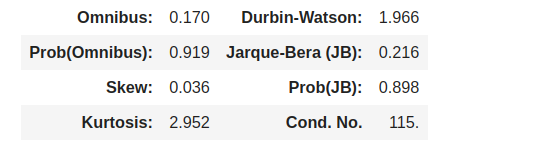

O teste Omnibus desempenha o papel de avaliar a normalidade da distribuição dos resíduos, ou seja, dos erros. Esse aspecto é de extrema importância, visto que os erros devem aderir a uma distribuição normal. Para realizar essa análise, o cálculo envolve o uso das medidas de assimetria (skewness) e curtose (kurtosis). Um valor de 0 para essas medidas indicaria uma conformidade perfeita com a normalidade.

A probabilidade Omnibus (Prob(Omnibus)) expressa a chance de que a normalidade seja representada pelo atributo mencionado acima. Um valor de 1 indicaria uma concordância absoluta com a normalidade.

A medida de assimetria (skewness) avalia a simetria presente em nosso conjunto de dados, sendo 0 o valor que indica uma simetria perfeita.

Por outro lado, a curtose (kurtosis) avalia a concentração dos dados em torno do valor zero, em conformidade com a curva normal. Quanto maior o valor da curtose, menor a presença de valores atípicos (outliers).

O teste Durbin-Watson serve para avaliar a homoscedasticidade, que assume uma variância constante nos resíduos. Uma homoscedasticidade inadequada poderia indicar uma variação inconsistente na distribuição, revelando que o modelo não se ajustou bem aos dados. O intervalo desejado para um ajuste homoscedástico ideal é entre 1 e 2.

Por sua vez, os testes Jarque-Bera (JB) e sua probabilidade associada (Prob(JB)) são alternativas ao teste Omnibus. Eles trabalham em conjunto para corroborar um ao outro. Embora não precisem ser idênticos, espera-se que estejam relativamente próximos em seus resultados.

O número de condição (condition number) mede a sensibilidade do modelo diante de mudanças nos dados. Um alto número de condição está associado à multicolinearidade, que ocorre quando variáveis independentes estão fortemente correlacionadas, influenciando de maneira equivocada a variável dependente e causando ambiguidade nos resultados.

## Análise de resíduos

Os resíduos do nosso modelo devem seguir algumas propriedades muito importantes

1. Linearidade
2. Homoscedasticidade
3. Independência
4. Normalidade


Pudemos entender, que o Scipy consegue descrever a maioria destas propriedades, mas podemos visualizá-las graficamente.

Iremos realizar a análise dos resíduos, pois podemos entender como o modelo de regressão se ajusta com base nos resíduos, e a diferença entre a resposta observada com a estimada pelo modelo, ou seja, o erro.

### Linearidade

Ao representarmos graficamente os resíduos em relação aos valores ajustados, conseguimos identificar possíveis padrões não lineares presentes nos resíduos. Nos casos em que empregamos a metodologia de mínimos quadrados, pressupõe-se que os dados podem ser modelados através de uma linha reta. Caso essa premissa de linearidade não se mantenha, observaremos um padrão distinto no gráfico, indicado por uma linha de tendência aproximadamente horizontal.

In [30]:
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados (y- chapeu)

Text(0, 0.5, 'Residuals')

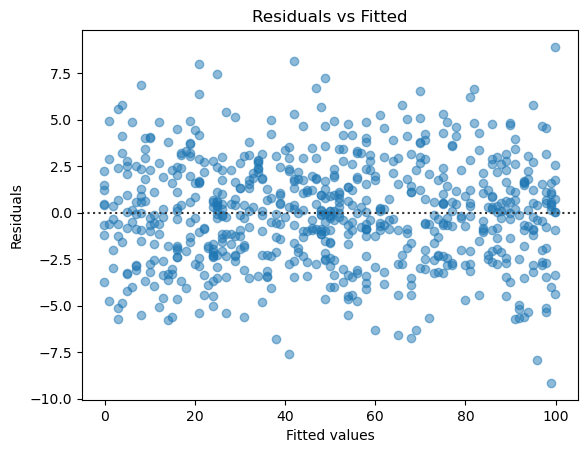

In [31]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=modelo_ajust_y, y=df.columns[-1], data=df,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
                          
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

### Homoscedasticidade

É interessante notar que a linha horizontal deve ter pontos igualmente dispersos ao redor dela, indicando uma boa homocedasticidade.

In [32]:
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados

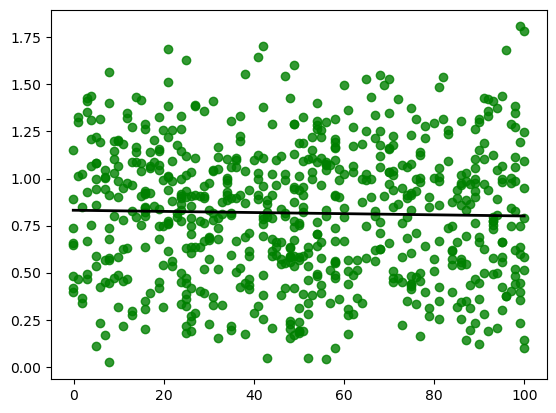

In [33]:
plot_lm_3 = plt.figure()
plt.scatter(modelo_ajust_y, modelo_norm_resid_abs, alpha=0.8,color ='green');


sns.regplot(x=modelo_ajust_y, y=modelo_norm_resid_abs,
            scatter=False,
            ci=False,
            line_kws={'color': 'black', 'lw': 2, 'alpha': 1});



### Normalidade

Aqui, temos a oportunidade de construir um gráfico QQ-plot e interpretar como os resíduos se alinham a essa linha. Ao fazer isso, podemos fazer uma suposição preliminar de que os resíduos aderem a uma distribuição normal. Se os resíduos não seguissem esse padrão linear, abriria espaço para uma investigação mais aprofundada sobre a natureza da distribuição dos resíduos.

/home/gab04/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


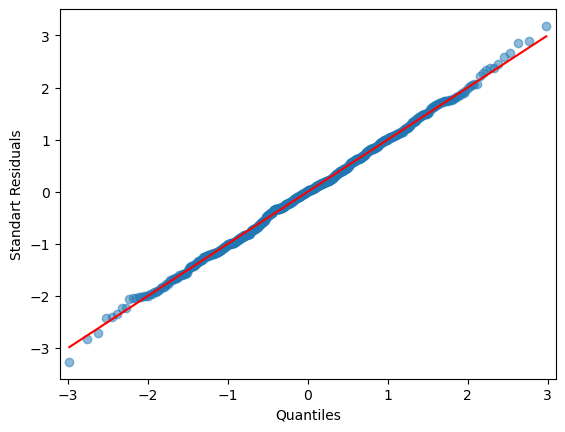

In [34]:
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados

sm.qqplot(modelo_norm_resid,line='s', alpha=0.5, color='red', lw=1)
plt.xlabel("Quantiles")
plt.ylabel("Standart Residuals")

plt.show()


# Conclusão

Com esta breve análise de um conjunto de dados aleátorios, pudemos entender e compreender como realizar uma regressão simples utilizando python com diferentes ferramentas, SkLearn ou o Scipy, e também fomos capazes de compreender os resultados obtidos e fazer uma breve análise sobre eles. Sendo assim, temos conhecimento para aplicar a Regressão Linear para tratar problemas reais no futuro aplicando as técnicas exibidas acima. Uma possível aplicação desta téncia pode ser para feature selection, já que caso X consiga explicar muito bem os valores da variável Y, podemos apenas remover Y, visto que X já nos promove um bom entendimento sobre esta variável Y.